# Figure 5: Quality of the ligth-evoked responses

# Imports

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from scipy import stats
import scipy.stats
import statistics
import data_plots
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from scipy.signal import find_peaks
import pandas as pd

# --------------------------------------------------------------------

# Load data

In [2]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE'
file_path = '/gpfs01/euler/User/ndyszkant/PhD/Manuscript/Functional diversity rd10/Figures/submission/data/rd10_data_20240304_all_cells.pkl'
rd10_df = pd.read_pickle(file_path)  
# multiindex df to single index df
rd10_df = rd10_df.reset_index(level=[0,1,2,3,4,5,6,7,8,9,10,11])
# drop unnecessary keys
rd10_df = rd10_df.drop(columns=['training_data_hash','classifier_params_hash','preprocess_id','condition','raw_id','gchirp','bar'])
missing_genline_idx = np.where(rd10_df['genline']=='')[0]
rd10_df['genline'][missing_genline_idx]='rd10'
#exclude P60 data
idx_p60 = np.where(rd10_df['animrem'].values=='P60')[0]
rd10_df = rd10_df.drop(idx_p60)
rd10_df = rd10_df.reset_index(drop=True)

/tmp/ipykernel_21735/4172113256.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd10_df['genline'][missing_genline_idx]='rd10'


In [3]:
rd10_df.keys()

Index(['experimenter', 'date', 'exp_num', 'field', 'roi_id', 'preproc_chirp',
       'preproc_bar', 'animgender', 'celltype', 'max_confidence',
       'roi_size_um2', 'gchirp_on_off_index', 'gchirp_transience_index',
       'bar_ds_index', 'bar_ds_pvalue', 'bar_pref_dir', 'bar_os_index',
       'bar_os_pvalue', 'bar_pref_or', 'bar_d_qi', 'gchirp_qidx', 'animrem',
       'genline'],
      dtype='object')

# --------------------------------------------------------------------

# Helper functions



In [4]:
try:
    import statsmodels
except ImportError:
    !sudo pip install statsmodels

try:
    from statannotations.Annotator import Annotator
except ImportError:
    !sudo pip install statannotations
    from statannotations.Annotator import Annotator

import seaborn as sns
def plot_test(ax, df, x, y, order, pairs, test="mann-whitney", hue=None, hue_order=None, palette=None, marker=None, ylabel=None):
    sns.boxplot(ax=ax, data=df, x=x, y=y, fliersize=0, palette=palette, order=order, hue=hue, hue_order=hue_order)
    
    annotator = Annotator(ax=ax, pairs=pairs, plot='boxplot', data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
    annotator.configure(test=test, comparisons_correction="BH" if len(order) > 2 else None,
                        text_format='star', loc='outside', verbose=2,
                        text_offset=-0.1, fontsize=9, line_height=0.02, line_offset=0.0, line_width=1)
    annotator.apply_test().annotate(line_offset_to_group=0.02, line_offset=0.01)
    
    if ylabel is not None:
        ax.set_ylabel(ylabel)

# --------------------------------------------------------------------

# Percent of cells exceeding QI thresholds

In [5]:
# CHIRP WT
## exceeding threshold
wt_p30_qi=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P30') & (rd10_df['gchirp_qidx']>=0.35)]['gchirp_qidx'].tolist()
wt_p30_qi=(len(wt_p30_qi))
wt_p45_qi=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P45') & (rd10_df['gchirp_qidx']>=0.35)]['gchirp_qidx'].tolist()
wt_p45_qi=(len(wt_p45_qi))
wt_p90_qi=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P90') & (rd10_df['gchirp_qidx']>=0.35)]['gchirp_qidx'].tolist()
wt_p90_qi=(len(wt_p90_qi))
wt_p180_qi=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P180') & (rd10_df['gchirp_qidx']>=0.35)]['gchirp_qidx'].tolist()
wt_p180_qi=(len(wt_p180_qi))

## all cells
wt_p30=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P30')]['gchirp_qidx'].tolist()
wt_p30=(len(wt_p30))
wt_p45=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P45')]['gchirp_qidx'].tolist()
wt_p45=(len(wt_p45))
wt_p90=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P90')]['gchirp_qidx'].tolist()
wt_p90=(len(wt_p90))
wt_p180=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P180')]['gchirp_qidx'].tolist()
wt_p180=(len(wt_p180))

## percent
wt_p30_percent=np.round((wt_p30_qi/wt_p30)*100,2)
wt_p45_percent=np.round((wt_p45_qi/wt_p45)*100,2)
wt_p90_percent=np.round((wt_p90_qi/wt_p90)*100,2)
wt_p180_percent=np.round((wt_p180_qi/wt_p180)*100,2)

#print
print(wt_p30_percent,wt_p45_percent,wt_p90_percent,wt_p180_percent)

36.41 41.92 35.55 49.86


In [6]:
# CHIRP RD
## exceeding threshold
rd_p30_qi=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P30') & (rd10_df['gchirp_qidx']>=0.35)]['gchirp_qidx'].tolist()
rd_p30_qi=(len(rd_p30_qi))
rd_p45_qi=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P45') & (rd10_df['gchirp_qidx']>=0.35)]['gchirp_qidx'].tolist()
rd_p45_qi=(len(rd_p45_qi))
rd_p90_qi=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P90') & (rd10_df['gchirp_qidx']>=0.35)]['gchirp_qidx'].tolist()
rd_p90_qi=(len(rd_p90_qi))
rd_p180_qi=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P180') & (rd10_df['gchirp_qidx']>=0.35)]['gchirp_qidx'].tolist()
rd_p180_qi=(len(rd_p180_qi))

## all cells
rd_p30=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P30')]['gchirp_qidx'].tolist()
rd_p30=(len(rd_p30))
rd_p45=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P45')]['gchirp_qidx'].tolist()
rd_p45=(len(rd_p45))
rd_p90=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P90')]['gchirp_qidx'].tolist()
rd_p90=(len(rd_p90))
rd_p180=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P180')]['gchirp_qidx'].tolist()
rd_p180=(len(rd_p180))

## percent
rd_p30_percent=np.round((rd_p30_qi/rd_p30)*100,2)
rd_p45_percent=np.round((rd_p45_qi/rd_p45)*100,2)
rd_p90_percent=np.round((rd_p90_qi/rd_p90)*100,2)
rd_p180_percent=np.round((rd_p180_qi/rd_p180)*100,2)

#print
print(rd_p30_percent,rd_p45_percent,rd_p90_percent,rd_p180_percent)

46.31 31.34 15.93 0.41


In [7]:
# MB WT
## exceeding threshold
wt_p30_qi=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P30') & (rd10_df['bar_d_qi']>=0.6)]['bar_d_qi'].tolist()
wt_p30_qi=(len(wt_p30_qi))
wt_p45_qi=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P45') & (rd10_df['bar_d_qi']>=0.6)]['bar_d_qi'].tolist()
wt_p45_qi=(len(wt_p45_qi))
wt_p90_qi=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P90') & (rd10_df['bar_d_qi']>=0.6)]['bar_d_qi'].tolist()
wt_p90_qi=(len(wt_p90_qi))
wt_p180_qi=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P180') & (rd10_df['bar_d_qi']>=0.6)]['bar_d_qi'].tolist()
wt_p180_qi=(len(wt_p180_qi))

## all cells
wt_p30=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P30')]['bar_d_qi'].tolist()
wt_p30=(len(wt_p30))
wt_p45=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P45')]['bar_d_qi'].tolist()
wt_p45=(len(wt_p45))
wt_p90=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P90')]['bar_d_qi'].tolist()
wt_p90=(len(wt_p90))
wt_p180=rd10_df[(rd10_df['genline']== 'Bl6') & (rd10_df['animrem']=='P180')]['bar_d_qi'].tolist()
wt_p180=(len(wt_p180))

## percent
wt_p30_percent_mb=np.round((wt_p30_qi/wt_p30)*100,2)
wt_p45_percent_mb=np.round((wt_p45_qi/wt_p45)*100,2)
wt_p90_percent_mb=np.round((wt_p90_qi/wt_p90)*100,2)
wt_p180_percent_mb=np.round((wt_p180_qi/wt_p180)*100,2)



In [8]:
# MB RD
## exceeding threshold
rd_p30_qi=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P30') & (rd10_df['bar_d_qi']>=0.6)]['bar_d_qi'].tolist()
rd_p30_qi=(len(rd_p30_qi))
rd_p45_qi=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P45') & (rd10_df['bar_d_qi']>=0.6)]['bar_d_qi'].tolist()
rd_p45_qi=(len(rd_p45_qi))
rd_p90_qi=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P90') & (rd10_df['bar_d_qi']>=0.6)]['bar_d_qi'].tolist()
rd_p90_qi=(len(rd_p90_qi))
rd_p180_qi=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P180') & (rd10_df['bar_d_qi']>=0.6)]['bar_d_qi'].tolist()
rd_p180_qi=(len(rd_p180_qi))

## all cells
rd_p30=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P30')]['bar_d_qi'].tolist()
rd_p30=(len(rd_p30))
rd_p45=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P45')]['bar_d_qi'].tolist()
rd_p45=(len(rd_p45))
rd_p90=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P90')]['bar_d_qi'].tolist()
rd_p90=(len(rd_p90))
rd_p180=rd10_df[(rd10_df['genline']== 'rd10') & (rd10_df['animrem']=='P180')]['bar_d_qi'].tolist()
rd_p180=(len(rd_p180))

## percent
rd_p30_percent_mb=np.round((rd_p30_qi/rd_p30)*100,2)
rd_p45_percent_mb=np.round((rd_p45_qi/rd_p45)*100,2)
rd_p90_percent_mb=np.round((rd_p90_qi/rd_p90)*100,2)
rd_p180_percent_mb=np.round((rd_p180_qi/rd_p180)*100,2)


# --------------------------------------------------------------------

# Plot Panel A and B

In [ ]:
# Set context
data_plots.style.set_rc_params(kind='paper', notebook_dpi=120)

# Create plot
fig, axs = plt.subplots(1, 4)

# Set size
data_plots.style.set_figsize(fig, 'full', height_ratio=0.22)
data_plots.utils.set_labs(axs, panel_nums='auto', panel_num_pad=10,panel_num_space=11)

# Tweaking
data_plots.utils.move_xaxis_outward(axs)

# Chirp QI distributions
x_order=['P30', 'P45', 'P90', 'P180']
hue_order=['Bl6','rd10']    
pairs=[[(xi,hi) for hi in hue_order] for xi in x_order]
# Create the subplot before setting ylim
axs[0].plot([])  # An empty plot to create the subplot
axs[0].set_ylim(0, 1)  # Set the y-axis limits
ax=plot_test(ax=axs[0],df=rd10_df,x='animrem',y='gchirp_qidx',hue='genline',order=x_order,pairs=pairs,marker='o',test="Mann-Whitney",palette={'Bl6':'w','rd10':'m'})
axs[0].axhline(0.35,color='k',linestyle='--',linewidth=0.5)
axs[0].set_ylabel("QI$_\mathrm{Chirp}$")
axs[0].spines['bottom'].set_visible(False)
axs[0].tick_params(axis='x', which='both', bottom=False)
axs[0].set_xlabel('')


# MB QI distributions
x_order=['P30', 'P45', 'P90', 'P180']
hue_order=['Bl6','rd10']    
pairs=[[(xi,hi) for hi in hue_order] for xi in x_order]
# Create the subplot before setting ylim
axs[1].plot([])  # An empty plot to create the subplot
axs[1].set_ylim(0, 1)  # Set the y-axis limits
ax=plot_test(ax=axs[1], df=rd10_df, x='animrem', y="bar_d_qi", ylabel='QI$_\mathrm{mb}$',order=x_order, pairs=pairs, marker='o', test="Mann-Whitney", hue='genline',palette={'Bl6':'w','rd10':'m'})
axs[1].axhline(0.6,color='k',linestyle='--',linewidth=0.5)
axs[1].set_ylabel("QI$_\mathrm{MB}$")
axs[1].spines['bottom'].set_visible(False)
axs[1].tick_params(axis='x', which='both', bottom=False)
axs[1].set_xlabel('')

# Percentage of cells exceeding chirp threshold
axs[2].bar(np.arange(0,4,1)-0.15,[wt_p30_percent,wt_p45_percent,wt_p90_percent,wt_p180_percent],width=0.3,edgecolor='k',color='w',label='wt')
axs[2].bar(np.arange(0,4,1)+0.15,[rd_p30_percent,rd_p45_percent,rd_p90_percent,rd_p180_percent],width=0.3,edgecolor='k',color='m',label='rd10')
axs[2].set_ylabel('Exceeding QI$_\mathrm{Chirp}$ [%]')
axs[2].spines['bottom'].set_visible(False)
axs[2].tick_params(axis='x', which='both', bottom=False)
axs[2].xaxis.set_major_locator(plt.NullLocator())  # Remove major ticks from x-axis
axs[2].spines['bottom'].set_color('white')  # Set x-axis color to white
axs[2].set_xlabel('')
# Set the xticks and labels
axs[2].set_xticks(range(len(x_order)))
axs[2].set_xticklabels(x_order)


# Percentage of cells exceeding mb threshold
axs[3].bar(np.arange(0,4,1)-0.15,[wt_p30_percent_mb,wt_p45_percent_mb,wt_p90_percent_mb,wt_p180_percent_mb],width=0.3,edgecolor='k',color='w',label='wt')
axs[3].bar(np.arange(0,4,1)+0.15,[rd_p30_percent_mb,rd_p45_percent_mb,rd_p90_percent_mb,rd_p180_percent_mb],width=0.3,edgecolor='k',color='m',label='rd10')
axs[3].set_ylabel('Exceeding QI$_\mathrm{MB}$ [%]')
axs[3].spines['bottom'].set_visible(False)
axs[3].tick_params(axis='x', which='both', bottom=False)
axs[3].xaxis.set_major_locator(plt.NullLocator())  # Remove major ticks from x-axis
axs[3].spines['bottom'].set_color('white')  # Set x-axis color to white
axs[3].set_xlabel('')
# Set the xticks and labels
axs[3].set_xticks(range(len(x_order)))
axs[3].set_xticklabels(x_order)



#legend
axs[0].legend([],[], frameon=False,fontsize=8)
axs[1].legend([],[], frameon=False,fontsize=8)
axs[2].legend([],[], frameon=False,fontsize=8)
axs[3].legend([],[], frameon=False,fontsize=8)

# Similar to standard tight_layout, but relative to fontsize used
data_plots.utils.tight_layout(rect=(0.01, 0, 1, 1),w_pad=2.6,h_pad=1.5)

#plt.savefig('Fig5_QI_responses.pdf')

# Make sure nothing is cut off, when saving
# Avoid using bbox_inches='tight', because it will resize the figure
data_plots.utils.show_saved_figure(fig)

# --------------------------------------------------------------------

# Plot Panel C - reliable RFs

## load RF data frames

In [16]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE'
file_path = '/gpfs01/euler/User/ndyszkant/PhD/Manuscript/Functional diversity rd10/Figures/submission/data/rf_filtered_df.pkl'
rf_filtered_df = pd.read_pickle(file_path)  
file_path = '/gpfs01/euler/User/ndyszkant/PhD/Manuscript/Functional diversity rd10/Figures/submission/data/all_rf_df.pkl'
all_rf_df = pd.read_pickle(file_path)  
# multiindex df to single index df
#rf_df = rf_df.reset_index(level=[0,1,2,3,4,5,6,7,8,9,10,11])

In [17]:
all_rf_df

,experimenter,date,exp_num,raw_id,field,region,shifty,cond1,roi_id,preprocess_id,dnoise_params_id,rf_glm_params_id,genline,animrem
0,Dyszkant,2022-08-05,2,1,GCL0,RR,shifty,control,8,1,1,1,Bl6,P180
1,Dyszkant,2022-08-05,2,1,GCL0,RR,shifty,control,8,1,1,3,Bl6,P180
2,Dyszkant,2022-08-05,2,1,GCL0,RR,shifty,control,8,1,2,1,Bl6,P180
3,Dyszkant,2022-08-05,2,1,GCL0,RR,shifty,control,14,1,1,1,Bl6,P180
4,Dyszkant,2022-08-05,2,1,GCL0,RR,shifty,control,14,1,1,3,Bl6,P180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8316,Dyszkant,2024-01-25,2,1,GCL8,RR,shifty,control,88,1,2,1,rd10,P30
8317,Dyszkant,2024-01-25,2,1,GCL8,RR,shifty,control,93,1,1,1,rd10,P30
8318,Dyszkant,2024-01-25,2,1,GCL8,RR,shifty,control,93,1,2,1,rd10,P30
8319,Dyszkant,2024-01-25,2,1,GCL8,RR,shifty,control,95,1,1,1,rd10,P30


In [18]:
rf_filtered_df

,experimenter,date,exp_num,raw_id,field,region,stim_name,cond1,roi_id,preprocess_id,dnoise_params_id,rf_glm_params_id,genline,animrem
0,Dyszkant,2022-08-05,2,1,GCL0,RR,shifty,control,41,1,1,2,Bl6,P180
1,Dyszkant,2022-08-05,2,1,GCL0,RR,shifty,control,60,1,1,1,Bl6,P180
2,Dyszkant,2022-08-05,2,1,GCL0,RR,shifty,control,80,1,1,1,Bl6,P180
3,Dyszkant,2022-08-05,2,1,GCL0,RR,shifty,control,92,1,1,1,Bl6,P180
4,Dyszkant,2022-08-05,2,1,GCL0,RR,shifty,control,101,1,1,1,Bl6,P180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Dyszkant,2024-01-25,2,1,GCL8,RR,shifty,control,82,1,1,1,rd10,P30
2005,Dyszkant,2024-01-25,2,1,GCL8,RR,shifty,control,85,1,1,1,rd10,P30
2006,Dyszkant,2024-01-25,2,1,GCL8,RR,shifty,control,86,1,1,1,rd10,P30
2007,Dyszkant,2024-01-25,2,1,GCL8,RR,shifty,control,88,1,1,1,rd10,P30


# --------------------------------------------------------------------

## Count all RFs

In [19]:
df_counts = all_rf_df.groupby(['genline', 'animrem']).size().reset_index(name='count')

# Initialize variables to store counts
bl6_p30_count = 0
bl6_p45_count = 0
bl6_p90_count = 0
rd10_p30_count = 0
rd10_p45_count = 0
rd10_p90_count = 0

# Populate counts for Bl6 and rd10
for _, row in df_counts.iterrows():
    genline = row['genline']
    age = row['animrem']
    count = row['count']
    
    if genline == 'Bl6':
        if age == 'P30':
            bl6_p30_count = count
        elif age == 'P45':
            bl6_p45_count = count
        elif age == 'P90':
            bl6_p90_count = count
    elif genline == 'rd10':
        if age == 'P30':
            rd10_p30_count = count
        elif age == 'P45':
            rd10_p45_count = count
        elif age == 'P90':
            rd10_p90_count = count

# Print the counts in the desired format
print(f"Bl6 P30 count: {bl6_p30_count}")
print(f"Bl6 P45 count: {bl6_p45_count}")
print(f"Bl6 P90 count: {bl6_p90_count}")
print(f"rd10 P30 count: {rd10_p30_count}")
print(f"rd10 P45 count: {rd10_p45_count}")
print(f"rd10 P90 count: {rd10_p90_count}")

Bl6 P30 count: 1534
Bl6 P45 count: 1265
Bl6 P90 count: 1016
rd10 P30 count: 804
rd10 P45 count: 2034
rd10 P90 count: 1027


## Count good quality (quality filtered) RFs 

In [20]:
df_counts = rf_filtered_df.groupby(['genline', 'animrem']).size().reset_index(name='count')

# Initialize variables to store counts
bl6_p30_count_rf = 0
bl6_p45_count_rf = 0
bl6_p90_count_rf = 0
rd10_p30_count_rf = 0
rd10_p45_count_rf = 0
rd10_p90_count_rf = 0

# Populate counts for Bl6 and rd10
for _, row in df_counts.iterrows():
    genline = row['genline']
    age = row['animrem']
    count = row['count']
    
    if genline == 'Bl6':
        if age == 'P30':
            bl6_p30_count_rf = count
        elif age == 'P45':
            bl6_p45_count_rf = count
        elif age == 'P90':
            bl6_p90_count_rf = count
    elif genline == 'rd10':
        if age == 'P30':
            rd10_p30_count_rf = count
        elif age == 'P45':
            rd10_p45_count_rf = count
        elif age == 'P90':
            rd10_p90_count_rf = count

# Print the counts in the desired format
print(f"Bl6 P30 count: {bl6_p30_count_rf}")
print(f"Bl6 P45 count: {bl6_p45_count_rf}")
print(f"Bl6 P90 count: {bl6_p90_count_rf}")
print(f"rd10 P30 count: {rd10_p30_count_rf}")
print(f"rd10 P45 count: {rd10_p45_count_rf}")
print(f"rd10 P90 count: {rd10_p90_count_rf}")

Bl6 P30 count: 391
Bl6 P45 count: 394
Bl6 P90 count: 276
rd10 P30 count: 202
rd10 P45 count: 543
rd10 P90 count: 71


# --------------------------------------------------------------------

### Calculate percent

In [21]:
wt_p30_percent = (bl6_p30_count_rf/bl6_p30_count)*100
wt_p45_percent = (bl6_p45_count_rf/bl6_p45_count)*100
wt_p90_percent = (bl6_p90_count_rf/bl6_p90_count)*100

rd_p30_percent = (rd10_p30_count_rf/rd10_p30_count)*100
rd_p45_percent = (rd10_p45_count_rf/rd10_p45_count)*100
rd_p90_percent = (rd10_p90_count_rf/rd10_p90_count)*100

In [22]:
import pandas as pd

# Create a DataFrame with the calculated percentages
percentages_df = pd.DataFrame({
    'age': ['P30', 'P45', 'P90', 'P30', 'P45', 'P90'],
    'percentage': [wt_p30_percent, wt_p45_percent, wt_p90_percent,
                   rd_p30_percent, rd_p45_percent, rd_p90_percent],
    'genline': ['Bl6'] * 3 + ['rd10'] * 3
})

# --------------------------------------------------------------------

/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


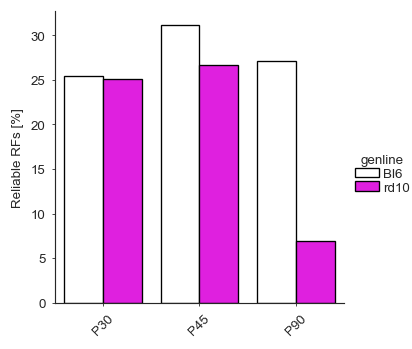

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font to Arial
plt.rcParams['font.family'] = 'Arial'

# Create the bar plot using seaborn
g = sns.catplot(
    data=percentages_df,
    x='age', 
    y='percentage', 
    hue='genline', 
    kind='bar', 
    palette={'Bl6': 'white', 'rd10': 'magenta'},
    edgecolor='black',
    height=3,    # Adjust height for a better plot
    aspect=1.0    # Adjust aspect ratio for a better plot
)

# Customizing the plot
g.set_axis_labels('', 'Reliable RFs [%]')
#g.fig.suptitle('Percentage of RF Sizes by Genline and Age (P30, P45, P90)', y=1.02)

# Access the Axes object
ax = g.ax
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for readability

# Adjust layout
#plt.tight_layout()

#plt.savefig('SupplFig_RFs_2024-09-03.pdf')

# Show plot
plt.show()


# --------------------------------------------------------------------

# Plot Panel D - classified cells